# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable. 
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or 
<a href="http://www.google.com">Google</a><br>

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


## Downloaded Dataset Requirement



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

def data_parser():
  #raw data set 
  data_set = pd.read_csv("/content/drive/MyDrive/datasetcsproject.csv")
  display(data_set)
  
  #deleting columns 
  data_set.drop(columns=["DATAFLOW", "OBS_STATUS:Observation Status", "UNIT_MULTIPLIER:Unit multiplier", "OBS_CONF:Observation confidentaility", "LOWER_BOUND:Lower Bound", "UPPER_BOUND:Upper Bound", "WGTD_SAMPL_SIZE:Weighted Sample Size", "OBS_FOOTNOTE:Observation footnote", "SERIES_FOOTNOTE:Series footnote","SOURCE_LINK:Citation of or link to the data source","CUSTODIAN:Custodian", "TIME_PERIOD_METHOD:Time period activity related to when the data are collected", "REF_PERIOD:Reference Period", "COVERAGE_TIME:The period of time for which data are provided", "AGE:Current age"], inplace =  True)
  
  #renaming headers
  rename_dict = {"REF_AREA:Geographic area":"Geographic area","INDICATOR:Indicator": "Indicator","SEX:Sex":"Sex","TIME_PERIOD:Time period":"Time period","OBS_VALUE:Observation Value": "Observation Value", "UNIT_MEASURE:Unit of measure": "Unit of measure", "DATA_SOURCE:Data Source":"Data Source", "COVERAGE_TIME:The period of time for which data are provided": "Coverage Time"}
  data_set.rename(columns=rename_dict, inplace=True)
  
  #Cleaning information - making things prettier 
  data_set["Geographic area"] = data_set["Geographic area"].str.split(": ",expand=True)[1]
  data_set["Indicator"] = data_set["Indicator"].str.split(": ",expand=True)[1]
  data_set["Sex"] = data_set["Sex"].str.split(": ",expand=True)[1]
  condition_2 = data_set["Sex"].isin(["Total"])
  data_set["Sex"] = np.where(condition_2, "Male & Female", data_set["Sex"])
  data_set["Unit of measure"] = data_set["Unit of measure"].str.split(": ",expand=True)[1]
  
  #Rounding Observation Value
  data_set["Observation Value"] = pd.to_numeric(data_set["Observation Value"],errors = 'coerce')
  data_set["Observation Value"] = data_set["Observation Value"].round(2)  
  
  #Selecting only the countries we will use from Spotify 
  countries_spotify = ['Argentina', 'Brazil', 'Colombia', 'Costa Rica','Ecuador', 'El Salvador', 'Guatemala', 'Honduras', 'India', 'Indonesia','Mexico', 'Paraguay', 'Peru','South Africa', 'Thailand', 'Uruguay', 'Viet Nam']
  conditions = data_set['Geographic area'].astype('string').isin(countries_spotify)
  data_set = data_set[conditions]

  #Series with only the index we care about 
  IndicatorSeries = data_set['Indicator'].isin(['government expenditure on education (% government budget)','government expenditure on education (% GDP)','Completion rate for adolescents of lower secondary school age', 'Completion rate for youth of upper secondary education school age','Youth literacy rate for 15-24 years'])
  GenreSeries = data_set["Sex"].isin(["Male & Female"])
  conditions_2 = (IndicatorSeries) &(GenreSeries)
  data_set = data_set[conditions_2]

  #Reseting index
  data_set = data_set.reset_index()
  data_set.drop(columns="index", inplace =  True)

  #Exporting to new file
  writer = pd.ExcelWriter("clean_data_set.xlsx")
  data_set.to_excel(writer, sheet_name = "Complete Data Set")
  writer.save()

  return data_set
  
############ Function Call ############
data_parser = data_parser()
data_parser

#First data frame: the raw data set
#Second data frame: the clean data frame from which we will extract the information

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,TIME_PERIOD:Time period,OBS_VALUE:Observation Value,UNIT_MULTIPLIER:Unit multiplier,UNIT_MEASURE:Unit of measure,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,...,WGTD_SAMPL_SIZE:Weighted Sample Size,OBS_FOOTNOTE:Observation footnote,SERIES_FOOTNOTE:Series footnote,DATA_SOURCE:Data Source,SOURCE_LINK:Citation of or link to the data source,CUSTODIAN:Custodian,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,REF_PERIOD:Reference Period,COVERAGE_TIME:The period of time for which data are provided,AGE:Current age
0,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_DPR_TOT: Total dependency ratio,_T: Total,2012,97.9265883620883,0: Units,PCNT: %,NaN,NaN,...,NaN,235 countries including less than 90K countrie...,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,_T: Total
1,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_DPR_TOT: Total dependency ratio,_T: Total,2013,95.3389727909407,0: Units,PCNT: %,NaN,NaN,...,NaN,235 countries including less than 90K countrie...,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,_T: Total
2,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_DPR_TOT: Total dependency ratio,_T: Total,2014,92.6490095816471,0: Units,PCNT: %,NaN,NaN,...,NaN,235 countries including less than 90K countrie...,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,_T: Total
3,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_DPR_TOT: Total dependency ratio,_T: Total,2015,89.9540923341871,0: Units,PCNT: %,NaN,NaN,...,NaN,235 countries including less than 90K countrie...,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,_T: Total
4,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,AFG: Afghanistan,DM_DPR_TOT: Total dependency ratio,_T: Total,2016,87.9412589881934,0: Units,PCNT: %,NaN,NaN,...,NaN,235 countries including less than 90K countrie...,NaN,UNPD2019,NaN,NaN,NaN,NaN,NaN,_T: Total
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25024,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ZWE: Zimbabwe,ED_ROFST_L2: Out-of-school rate for adolescent...,M: Male,2019,21.8,NaN,PCNT: %,AD: Adjusted,NaN,...,NaN,NaN,NaN,MICS 2019,NaN,NaN,EOF: End of fieldwork,NaN,2019,_T: Total
25025,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ZWE: Zimbabwe,ED_ROFST_L2: Out-of-school rate for adolescent...,_T: Total,2019,19.1,NaN,PCNT: %,AD: Adjusted,NaN,...,NaN,NaN,NaN,MICS 2019,NaN,NaN,EOF: End of fieldwork,NaN,2019,_T: Total
25026,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ZWE: Zimbabwe,ED_ROFST_L3: Out-of-school rate for youth of u...,F: Female,2019,54.3,NaN,PCNT: %,AD: Adjusted,NaN,...,NaN,NaN,NaN,MICS 2019,NaN,NaN,EOF: End of fieldwork,NaN,2019,_T: Total
25027,UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...,ZWE: Zimbabwe,ED_ROFST_L3: Out-of-school rate for youth of u...,M: Male,2019,48.2,NaN,PCNT: %,AD: Adjusted,NaN,...,NaN,NaN,NaN,MICS 2019,NaN,NaN,EOF: End of fieldwork,NaN,2019,_T: Total


,Geographic area,Indicator,Sex,Time period,Observation Value,Unit of measure,Data Source
0,Argentina,government expenditure on education (% governm...,Male & Female,2017,13.26,%,World Bank Development Indicators
1,Argentina,government expenditure on education (% GDP),Male & Female,2017,5.46,%,World Bank Development Indicators
2,Argentina,Youth literacy rate for 15-24 years,Male & Female,2018,99.51,%,UIS
3,Argentina,Completion rate for adolescents of lower secon...,Male & Female,2020,79.32,%,MICS 2019-20
4,Argentina,Completion rate for youth of upper secondary e...,Male & Female,2020,60.20,%,MICS 2019-20
...,...,...,...,...,...,...,...
80,Viet Nam,government expenditure on education (% governm...,Male & Female,2018,14.47,%,World Bank Development Indicators
81,Viet Nam,government expenditure on education (% GDP),Male & Female,2018,4.17,%,World Bank Development Indicators
82,Viet Nam,Youth literacy rate for 15-24 years,Male & Female,2019,98.63,%,UIS
83,Viet Nam,Completion rate for adolescents of lower secon...,Male & Female,2014,83.70,%,MICS 2014


## Web Collection Requirement \#1


In [3]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
from pprint import pprint
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.common.by import By
from google.colab import drive
from bs4 import BeautifulSoup
import re
import sys
import json

#this function gets the top 200 songs with their artists from each country in the spotify charts
def web_parser1():
  soup = BeautifulSoup(open("/content/drive/MyDrive/SpotifyCharts.html"), "html.parser")
  ul =  soup.find_all("ul")
  country_list = []
  for country in ul[0]:
    if country != "\n":
      country_list.append(str(country))
  code_list = []
  for code in country_list[1:]:
    code_list.append(re.search("\"([a-z]{2})\"", code).group().strip("\""))

  sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')  
  PATH = "/usr/local/chromedriver"
  driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
  country_dict = {}
  for country in code_list:
    try:
      driver.get("https://spotifycharts.com/regional/" + country + "/weekly/2022-01-28--2022-02-04")
      country_tab = driver.find_element_by_xpath("/html/body/div[@id='content']")
      data = country_tab.text.split("\n")
      country_dict[data[7]] = []
      for num in range(14,len(data[14:]) + 14,2):
        song_list = data[num].split(" by ")
        song = song_list[0]
        artist = " ".join(song_list[1].split()[:-1])
        country_dict[data[7]].append((song,artist))
    except:
      continue
  
  with open("cleaned_top200songs.json", "w", encoding ='utf8') as output_file:
    json.dump(country_dict, output_file)

  return country_dict

############ Function Call ############
web_parser1 = web_parser1()
web_parser1

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graphics-driver

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: use options instead of chrome_options
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead


{'ARGENTINA': [('Tiago PZK: Bzrp Music Sessions, Vol. 48',
   'Bizarrap, Tiago PZK'),
  ('Entre Nosotros (Remix) [con Nicki Nicole]',
   'Tiago PZK, LIT killah, Maria Becerra'),
  ('Desesperados', 'Rauw Alejandro, Chencho Corleone'),
  ('Tranquila', 'FMK, Maria Becerra'),
  ('Bar', 'TINI, L-Gante'),
  ('TOP 5', 'Duki'),
  ('TITAN', 'Salastkbron'),
  ('Universo Paralelo', "La K'onga, Nahuel Pennisi"),
  ('Salimo de Noche', 'Tiago PZK, Trueno'),
  ('Hace Calor', 'Kaleb Di Masi, Omar Varela'),
  ('DANCE CRIP', 'Trueno'),
  ('Otra Noche', 'Los Ángeles Azules, Nicki Nicole'),
  ('De Enero a Diciembre', 'Emilia, Rusherking'),
  ('BB', 'MYA, Emilia'),
  ('Te Mentiría', "La K'onga"),
  ('rápido lento', 'Emilia, Tiago PZK'),
  ('Yendo No, Llegando', 'Perro Primo, EL NOBA, R Jota, Dj Plaga, DT.Bilardo'),
  ('El Mismo Aire', "La K'onga"),
  ('Medallo', 'Blessd, Justin Quiles, Lenny Tavárez'),
  ('Pa Tra Rkt', 'Callejero Fino, Pusho DJ'),
  ('Tacones Rojos', 'Sebastian Yatra'),
  ('Mal Acostumbrao

## Web Collection Requirement #2

In [4]:
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import re
import json

#this function uses the spotipy module to get the genres of the artists from the songs scraped in the web_parser1() function
def web_parser2():
  clientid = "d0f4fd2c0e5540feaa1238c05584aed6"
  secretid = "f8bdd96a013f40ad8deea8ae4e6d8ff4"
  client_credentials_manager = SpotifyClientCredentials(client_id=clientid, client_secret=secretid)
  sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

  country_dict = web_parser1

  countries = ['Argentina', 'Brazil', 'Colombia', 'Costa Rica','Ecuador', 'El Salvador', 'Guatemala', 'Honduras', 'India', 'Indonesia','Mexico', 'Paraguay', 'Peru','South Africa', 'Thailand', 'Uruguay', 'Viet Nam']
  countries2 = []
  for country in countries:
    countries2.append(country.upper())

  genre_dict = {}
  for key,value in country_dict.items():
    if key in countries2:
      genre_list = []
      for song_name,artist_name in value:
        try:
          search = sp.search(artist_name)
          track = search['tracks']['items'][0]
          artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
          genres = artist["genres"]
          for genre in genres:
            genre_list.append(genre)
        except:
          continue
      genre_dict[key] = genre_list

  with open("cleaned_genres.json", "w", encoding ='utf8') as output_file:
    json.dump(genre_dict, output_file)

  return genre_dict

############ Function Call ############
web_parser2 = web_parser2()
web_parser2

{'ARGENTINA': ['argentine hip hop',
  'pop venezolano',
  'trap argentino',
  'trap latino',
  'trap argentino',
  'puerto rican pop',
  'trap latino',
  'trap argentino',
  'trap latino',
  'trap triste',
  'latin pop',
  'pop argentino',
  'latin',
  'reggaeton',
  'trap latino',
  'pop argentino',
  'cuarteto',
  'trap argentino',
  'cumbia 420',
  'rkt',
  'rain',
  'gruperas inmortales',
  'musica mexicana',
  'nu-cumbia',
  'tropical',
  'pop argentino',
  'pop argentino',
  'cuarteto',
  'pop argentino',
  'cumbia 420',
  'cuarteto',
  'reggaeton',
  'trap latino',
  'rkt',
  'colombian pop',
  'latin',
  'reggaeton colombiano',
  'latin',
  'latin pop',
  'pop venezolano',
  'reggaeton',
  'trap latino',
  'trap argentino',
  'trap triste',
  'argentine hip hop',
  'trap argentino',
  'trap latino',
  'trap triste',
  'cumbia 420',
  'dominican pop',
  'latin',
  'latin hip hop',
  'rap dominicano',
  'reggaeton',
  'reggaeton flow',
  'trap latino',
  'latin pop',
  'pop argen

#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. 

2. 

3. 

4. (if applicable)

5. (if applicable)


## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source: https://data.unicef.org/resources/data_explorer/unicef_f/?dq=ALB+AFG+ARM+AGO+ATG+ARG+ABW+AUS+BEL+BLZ+BEN+BGR+TCD+CAN+CAF+CHI+CHL+COL+CUW+BRN+AUT+CMR+KHM+FIN+FJI+FRO+FLK+ETH+GMB+GAB+PYF+GUF+FRA+GHA+GEO+CUB+GIB+DEU+DZA+AIA+VGB+BWA+BMU+BTN+BOL+BES+BIH+BRA+GLP+GUM+GTM+GNB+GIN+GUY+LBR+LIE+LTU+MYS+MDV+MLI+MLT+MHL+MTQ+MRT+FSM+MCO+PRI+QAT+KOR+MDA+REU+ROU+RUS+RWA+KNA+LCA+MSR+MAR+MOZ+MMR+NRU+IMN+ASM+AND+BHS+PRK+EST+SWZ+HND+HUN+ISL+IND+IDN+IRN+IRQ+IRL+ISR+JPN+JOR+XKX+KEN+KWT+ITA+JAM+MEX+MYT+MUS+MNE+NAM+NPL+PAK+MKD+NIU+SPM+VCT+STP+SAU+SEN+SRB+SYC+SLE+SGP+SVK+SVN+SLB+SOM+ZAF+SSD+ESP+LKA+PSE+SDN+SUR+SWE+CHE+SYR+THA+TLS+UKR+USA+VEN+VNM+VIR+WLF+YEM+ZMB+BHR+BGD+BRB+BLR+BFA+CYM+CHN+HKG+COK+COG+CYP+CZE+CRI+CIV+HRV+COM+AZE+CPV+BDI+COD+DNK+DJI+DMA+DOM+ECU+EGY+SLV+GNQ+ERI+GRC+GRL+GRD+KAZ+KIR+KGZ+LAO+LBN+LBY+LVA+LSO+LUX+MAC+MDG+NLD+NIC+NER+NGA+MNP+NOR+PAN+PNG+OMN+TWN+PLW+PRY+PER+PHL+POL+PRT+BLM+SHN+SXM+MAF+WSM+SMR+TJK+TGO+TKL+TTO+TUN+TON+TUR+TKM+TCA+TUV+ARE+TZA+VUT+UZB+ZWE+URY+UGA+NCL+NZL+MWI+VAT+HTI+GBR.ECON+ECON_GVT_EDU_EXP_PTEXP+ECON_GVT_EDU_EXP_PTGDP+ECON_GVT_EXP_PTGDP+ECON_GVT_HLTH_EXP_PTEXP+ECON_GVT_HLTH_EXP_PTGDP+ECON_GVT_REV_PTGDP+ECON_ODA_INFLOW_PTGNI+ECON_ODA_INFLOW_USD+ECON_ODA_OUTFLOW_PTGNI+ECON_ODA_OUTFLOW_USD+ECON_SOC_PRO_EXP_PTEXP+ECON_SOC_PRO_EXP_PTGDP+DM+DM_DPR_TOT+DM_NET_MG_RATE+DM_POP_ADLCNT+DM_POP_ADLCNT_PROP+DM_POP_GRT+DM_POP_TOT+DM_POP_U18+DM_POP_URBN+DM_POP_U_GRT+EDUCATION+ED_15-24_LR+ED_ANAR_L02+ED_ANAR_L1+ED_ANAR_L2+ED_ANAR_L3+ED_CR_L1+ED_CR_L2+ED_CR_L3+ED_MAT_G23+ED_MAT_L1+ED_MAT_L2+ED_READ_G23+ED_READ_L1+ED_READ_L2+ED_ROFST_L0+ED_ROFST_L1+ED_ROFST_L2+ED_ROFST_L3...&startPeriod=2012&endPeriod=2022
*   Web Collection #1 Source: https://spotifycharts.com/regional 
*   Web Collection #2 Source: https://developer.spotify.com/web-api/

# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations
*   Export aggregated data to at least 1 summary file 

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function. 

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit. 

# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

## Insights

In [5]:
import pandas as pd
def insight1():
  data_set = data_parser
  data = data_set.groupby("Geographic area")["Observation Value"].sum()
  mean = round(data.mean(), 2)
  median = round(data.median(), 2)
  mean_median = pd.Series({"MEAN": mean, "MEDIAN": median})
  return mean_median

############ Function Call ############
insight1 = insight1()
insight1

MEAN      254.21
MEDIAN    263.33
dtype: float64

### Insight 1 Explanation

The first insight is a Series calculating the mean and median between the sum of observation values, which is our education level indicator, of every country in our sample. This insight gave us an idea of where the center value is located in the Data Set. These values carry information about our observations. With this, we could classify our countries by education levels and understand the distribution of our data.

In [6]:
import pandas as pd
def insight2_helper():
  data_set = data_parser
  data = pd.DataFrame(data_set.groupby("Geographic area")["Observation Value"].sum()).reset_index()
  return data

def insight2():
  educ_level = insight2_helper()
  educ_level.loc[educ_level['Observation Value'] < 240, 'Education Level'] = 'LOW'
  educ_level.loc[(educ_level['Observation Value'] > 240) & (educ_level['Observation Value'] < 270), 'Education Level'] = 'MID'
  educ_level.loc[educ_level['Observation Value'] > 270, 'Education Level'] = 'HIGH'
  educ_level.drop(educ_level.columns[1], axis = 1, inplace = True)
  educ_level['Geographic area'] = educ_level['Geographic area'].str.upper()
  educ_level = educ_level.set_index('Geographic area')
  return educ_level

############ Function Call ############
insight2_helper()
insight2 = insight2()
insight2

,Education Level
Geographic area,
ARGENTINA,MID
BRAZIL,HIGH
COLOMBIA,HIGH
COSTA RICA,MID
ECUADOR,HIGH
EL SALVADOR,LOW
GUATEMALA,LOW
HONDURAS,LOW
INDIA,LOW


### Insight 2 Explanation

The second insight uses the education indicators (sum of observation values of each country) to classify the countries in three education levels: low, mid and high. We set a range for each level of education considering the mean and median collected from the first insight.

In [7]:
def insight3_helper():
  genres_dict = web_parser2
  no_rep = ['pop', 'rock', 'hip hop', 'rap', 'trap', 'reggaeton', 'folklore', 'indie','house', 'funk', 
            'salsa', 'tropical', 'edm', 'opm', 'bachata', 'r&b', 'cumbia', 'vallenato']
  clean_genres = {}
  for country, genre_list in genres_dict.items():
    clean_genres[country] = {}
    for num_top_genre in range(len(genre_list)):
        for each in no_rep:
            if each in genre_list[num_top_genre]:
                genre_list[num_top_genre] = each
    for genre in genre_list:
        if genre not in clean_genres[country]:
            clean_genres[country][genre] = 1
        else:
            clean_genres[country][genre] += 1
  all_genres = clean_genres
  return all_genres

def insight3_helper1():
  for country, value in insight3_helper.items():
    insight3_helper[country] = [key for key,value in sorted(insight3_helper[country].items(), key=lambda x:x[1], reverse = True)][0:3]
  final_dict = {}
  for country,adict in insight3_helper.items():
    alist = []
    for key in adict:
      if len(alist) < 3:
          alist.append(key)
    final_dict[country] = alist
  return final_dict

def insight3():
  final_dict = insight3_helper1
  df_dict = {'Top 1 Genre': {},'Top 2 Genre': {},'Top 3 Genre': {}}
  for country in final_dict:
    df_dict['Top 1 Genre'][country] = final_dict[country][0]
    df_dict['Top 2 Genre'][country] = final_dict[country][1]
    df_dict['Top 3 Genre'][country] = final_dict[country][2]
  return pd.DataFrame(df_dict)

############ Function Call ############
insight3_helper = insight3_helper()
insight3_helper1 = insight3_helper1()
insight3 = insight3()
insight3

,Top 1 Genre,Top 2 Genre,Top 3 Genre
ARGENTINA,rap,pop,rock
BRAZIL,pop,funk,arrocha
COLOMBIA,reggaeton,rap,pop
COSTA RICA,rap,pop,reggaeton
ECUADOR,rap,pop,reggaeton
GUATEMALA,rap,reggaeton,latin
HONDURAS,rap,reggaeton,latin
INDONESIA,pop,hip hop,indonesian singer-songwriter
INDIA,pop,modern bollywood,filmi
MEXICO,rap,pop,latin


### Insight 3 Explanation

The third insight displays the top 3 genres per country retrieved from the top artists from each country. This is a main feature of our data analysis, since we are investigating if there is any correlation between countries' education and preferred genres.

In [8]:
import requests
def insight4_helper():
  continent = {}
  for country, genre_list in insight3_helper1.items():
    r = requests.get('https://restcountries.com/v3.1/name/' + country)
    data = r.json()
    if data[0]['region'] == 'Americas':
      if data[0]['subregion'] not in continent: 
        continent[data[0]['subregion']] = {}
      for genre in genre_list:
        if genre not in continent[data[0]['subregion']]:
          continent[data[0]['subregion']][genre] = 1
        else:
          continent[data[0]['subregion']][genre] += 1
    else:
      if data[0]['region'] not in continent: 
        continent[data[0]['region']] = {}
      for genre in genre_list:
        if genre not in continent[data[0]['region']]:
          continent[data[0]['region']][genre] = 1
        else:
          continent[data[0]['region']][genre] += 1
  for cont, value in continent.items():
    continent[cont] = [key for key,value in sorted(continent[cont].items(), key=lambda x:x[1], reverse = True)][0:3]
  final_dict = {}
  for cont,adict in continent.items():
    alist = []
    for key in adict:
      if len(alist) < 3:
          alist.append(key)
    final_dict[cont] = alist
  return final_dict

def insight4():
  final_dict = insight4_helper
  df_dict = {'Top 1 Genre': {},'Top 2 Genre': {},'Top 3 Genre': {}}
  for cont in final_dict:
    df_dict['Top 1 Genre'][cont] = final_dict[cont][0]
    df_dict['Top 2 Genre'][cont] = final_dict[cont][1]
    df_dict['Top 3 Genre'][cont] = final_dict[cont][2]
  return pd.DataFrame(df_dict)


############ Function Call ############
insight4_helper = insight4_helper()
insight4 = insight4()
insight4

,Top 1 Genre,Top 2 Genre,Top 3 Genre
South America,pop,rap,reggaeton
Central America,rap,reggaeton,latin
Asia,pop,hip hop,rap
North America,rap,pop,latin
Africa,pop,rap,hip hop


### Insight 4 Explanation

The fourth insight displays the top 3 genres per continent, supporting our findings per country in past insights. This table joined with the world map (visualization 2) which contains the education level of each country, gives an idea of the correlation between the two features.

In [9]:
from matplotlib.patches import Ellipse
import pandas as pd
from pprint import pprint
def insight5():
  adict = {}
  educ = insight2.to_dict()
  for country, atype in educ['Education Level'].items():
    if atype not in adict:
      adict[atype] = insight3_helper1[country]
    else:
      for each in insight3_helper1[country]:
        adict[atype].append(each)
  result = {}
  for level, alist in adict.items():
    result[level] = {}
    for genre in alist:
      if genre not in result[level]:
        result[level][genre] = 1
      else:
        result[level][genre] += 1
  df_result = pd.DataFrame(result)
  return df_result

############ Function Call ############
insight5 = insight5()
insight5

,MID,HIGH,LOW
rap,6.0,4.0,4.0
pop,6.0,6.0,2.0
rock,1.0,1.0,NaN
reggaeton,2.0,3.0,4.0
latin,1.0,NaN,3.0
hip hop,2.0,1.0,NaN
funk,NaN,1.0,NaN
arrocha,NaN,1.0,NaN
indonesian singer-songwriter,NaN,1.0,NaN
modern bollywood,NaN,NaN,1.0


### Insight 5 Explanation

The fifth insight portrays how many countries in each level of education (low, mid and high) holds a certain genre as one of the three preferred genres. This insight is meaningful as it counts the number of countries in each level of education that prefers each genre. This information is crucial to prove if there is a correlation between level of education and music taste.

## Data Visualizations

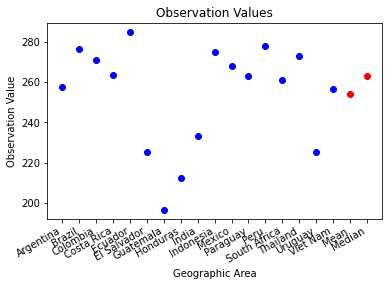

In [10]:
import matplotlib.pyplot as plt

def visual1():
  data = insight2_helper()
  x = data['Geographic area'].tolist()
  y = data['Observation Value'].tolist()
  a = ['Mean', 'Median']
  b = [insight1['MEAN'], insight1['MEDIAN']]
  plt.scatter(x, y, c='blue')
  plt.scatter(a, b, c='red')
  plt.title('Observation Values')
  plt.xlabel('Geographic Area')
  plt.ylabel('Observation Value')
  plt.gcf().autofmt_xdate()
  plt.savefig('scatter.png')
  plt.show()

############ Function Call ############
visual1()

### Visualization 1 Explanation

The first visualization is to support the first insight, which gives the mean and median of our indicators. This scatter plot is useful to support and visualize the distribution of indicators, and locate the mean and median (color red) among the countries' values (color blue).

In [11]:
import plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go
def visual2():
  df = insight2_helper()
  data = dict(type = 'choropleth', locations = df["Geographic area"].tolist(), 
              locationmode = 'country names', colorscale= 'Aggrnyl', 
              z=df["Observation Value"].tolist(), 
              colorbar = {'title':'Education Level'})
  layout = dict(geo={'scope':'world'})
  worldmap = go.Figure(data=data,layout=layout)
  iplot(worldmap)

############ Function Call ############
visual2()

### Visualization 2 Explanation

The second visualization supports the second and fourth insight by providing a world map that has colors to classify each of our sample's countries by education level. The color range shows an approximation of the level of education per country, going from low (dark blue) to high (light green).

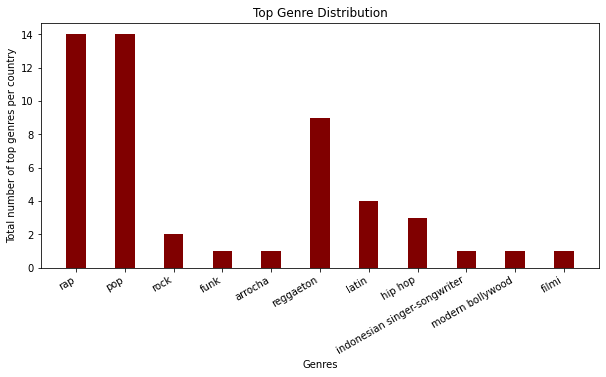

In [12]:
import matplotlib.pyplot as plt
def visual3():
  data = insight3
  all_genres = insight3.values.tolist()
  count = {}
  for each in all_genres:
    for genre in each:
      if genre in count:
        count[genre] += 1
      else:
        count[genre] = 1
  genres = count.keys()
  num = count.values()
  fig = plt.figure(figsize = (10, 5))
  # creating the bar plot
  plt.bar(genres, num, color ='maroon', width = 0.4)
  plt.xlabel("Genres")
  plt.ylabel("Total number of top genres per country")
  plt.title("Top Genre Distribution")
  plt.gcf().autofmt_xdate()
  plt.savefig('bar.png')
  plt.show()

############ Function Call ############
visual3()

### Visualization 3 Explanation

The third visualization supports the third insight, reinforcing the understanding of top genres per country. This bar chart shows a visual proportion of how many countries prefer a certain genre. Data was retrieved from the findings from the third insight and it highlights the variation of taste among the countries while supporting that some genres are consistently preferred by most countries.

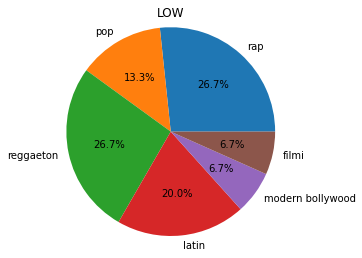

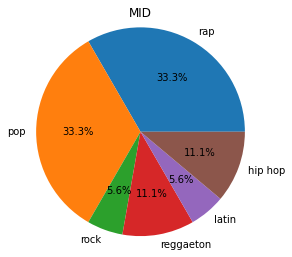

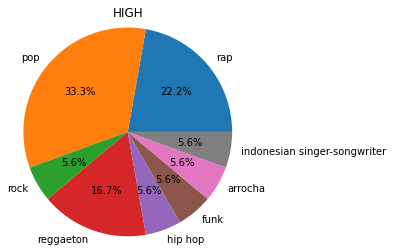

In [13]:
import matplotlib.pyplot as plt

def visual4():
  plt.figure(0)
  genres = insight5.index.values.tolist()
  numbers = insight5['LOW'].tolist()
  labels = []
  data = []
  for count in range(len(numbers)):
    if pd.isnull(numbers[count]) == False:
      labels.append(genres[count])
      data.append(numbers[count])
  plt.pie(data, labels=labels, autopct='%1.1f%%', radius=1.2)
  plt.title('LOW')
  plt.savefig('pie1.png')

  plt.figure(1)
  genres1 = insight5.index.values.tolist()
  numbers1 = insight5['MID'].tolist()
  labels1 = []
  data1 = []
  for count in range(len(numbers1)):
    if pd.isnull(numbers1[count]) == False:
      labels1.append(genres1[count])
      data1.append(numbers1[count])
  plt.pie(data1, labels=labels1, autopct='%1.1f%%', radius=1.2)
  plt.title('MID')
  plt.savefig('pie2.png')

  plt.figure(2)
  genres2 = insight5.index.values.tolist()
  numbers2 = insight5['HIGH'].tolist()
  labels2 = []
  data2 = []
  for count in range(len(numbers2)):
    if pd.isnull(numbers2[count]) == False:
      labels2.append(genres2[count])
      data2.append(numbers2[count])
  plt.pie(data2, labels=labels2, autopct='%1.1f%%', radius=1.2)
  plt.title('HIGH')
  plt.savefig('pie3.png')
  
  plt.show()

############ Function Call ############
visual4()

### Visualization 4 Explanation

The fourth visualization provides a pie chart for each level of education, showing each genre's percentage of countries that hold that genre in their top three. These pie charts helps us visualize the preferred genre for each level of education, and therefore draw conclusions to prove if correlation exists.

## Summary Files

In [15]:
def summary1():
  data1 = data_parser.groupby(["Indicator","Geographic area"])["Observation Value"].sum()

  data2 = insight1

  data3 = insight2.groupby(["Education Level", "Geographic area"])["Education Level"].count()
  data3 = pd.DataFrame(data3)
  data3 = data3.drop(columns = "Education Level")

  data4 = insight2
  data4 = pd.concat([data4, insight3], axis = 1)

  data5 = insight4

  data6 = insight5

  writer = pd.ExcelWriter('summary_file.xlsx')
  data1.to_excel(writer, sheet_name="Base Data")
  data2.to_excel(writer, sheet_name="Mean and Median")
  data3.to_excel(writer, sheet_name="Education Levels")
  data4.to_excel(writer, sheet_name="Findings")
  data5.to_excel(writer, sheet_name="Continents")
  data6.to_excel(writer, sheet_name="Conclusions")

  writer.save()

############ Function Call ############
summary1()

# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:


* https://www.selenium.dev/documentation/
* https://developer.spotify.com/documentation/web-api/quick-start/
* https://spotipy.readthedocs.io/en/2.19.0/
* https://matplotlib.org/stable/index.html
* https://plotly.com/python/
* https://plotly.com/python/choropleth-maps/



# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   https://youtu.be/6bkaI7IhjJM


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
